In [9]:
import numpy as np
import pandas as pd
import json

# Importing Data

In [646]:
fandom_nodes = pd.read_csv("C:/Users/SJ/Downloads/fandom_nodes.csv")
fandom_edges = pd.read_csv("C:/Users/SJ/Downloads/fandom_edges.csv")

In [61]:
fandom_nodes.head()

,fandom_id,fandom_name,jan_post,feb_post,type
0,000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0
1,19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1
2,2PM,2PM,1787,355,1
3,6kies,SECHSKIES : 젝스키스,49116,23535,1
4,Jessica,JESSICA : 제시카,1091,546,0


In [62]:
fandom_edges.head()

,source,target,jan_support,feb_support
0,000115sh,000115sh,0,1
1,000115sh,Jessica,15,0
2,000115sh,ahnhyungsub,30,1
3,000115sh,bigjaejun,13,0
4,000115sh,binhjleehjh,29,1


In [15]:
with open('C:/Users/SJ/Downloads/weekly_chart.json',encoding = 'UTF-8') as f:
  weekly = json.load(f)

with open('C:/Users/SJ/Downloads/monthly_chart.json',encoding = 'UTF-8') as f:
  monthly = json.load(f)

with open('C:/Users/SJ/Downloads/fandom_meta.json',encoding = 'UTF-8') as f:
  meta = json.load(f)

In [17]:
weekly[0]

{'id': 1,
 'album': '그날처럼',
 'artist': '장덕철',
 'rank': 1,
 'title': '그날처럼',
 'start': '2018-01-22 00:00:00',
 'end': '2018-01-28 00:00:00'}

In [18]:
monthly[0]

{'rank': 1,
 'title': '그날처럼',
 'artist': '장덕철',
 'album': '그날처럼',
 'start': '201801',
 'end': '201801'}

In [19]:
meta[0]

{'fandom_name': '6kies',
 'chart_name': None,
 'agent': 'YG Entertainment',
 'year(debut)': 1997,
 'post_num': 293338}

# Q1. 팬덤간 도움은 활발한가? 어떠한 팬덤이 활발하게 도움을 주고 받고 있는가?

In [88]:
edges2 = fandom_edges
# 1월과 2월의 support 합산
edges2['sum_support'] = edges2['jan_support'] + edges2['feb_support']
# 각각의 팬덤이 1월과 2월에 준 도움
gave_support = edges2.groupby('source')['sum_support'].sum()
# 각각의 팬덤이 1월과 2월에 받은 도움
given_support = edges2.groupby('target')['sum_support'].sum()
gave_support
# given_support

source
000115sh       1530
19980917       2312
2PM            2007
6kies          4674
Jessica        1175
               ... 
yoonjo         2146
yooyeonjung    3525
youjung        2003
yuseonho       3589
zico              3
Name: sum_support, Length: 245, dtype: int64

In [84]:
# 1월과 2월의 post 합산
nodes2 = fandom_nodes
nodes2['sum_post'] = nodes2['jan_post'] + nodes2['feb_post']

,fandom_id,fandom_name,jan_post,feb_post,type,sum_post
0,000115sh,KIM SU-HYUN : 김수현(미스틱),1547,249,0,1796
1,19980917,KIM DONG-HYUN / MXM : 김동현,3869,2853,1,6722
2,2PM,2PM,1787,355,1,2142
3,6kies,SECHSKIES : 젝스키스,49116,23535,1,72651
4,Jessica,JESSICA : 제시카,1091,546,0,1637


In [95]:
# 1월과 2월에 준 도움, 받은 도움 추가
merged = pd.DataFrame(fandom_nodes[['fandom_name','fandom_id','sum_post']])
merged = pd.merge(merged,gave_support,left_on = 'fandom_id',right_on = 'source')
merged.columns = ['fandom_name','fandom_id','sum_post','gave_support']
merged = pd.merge(merged,given_support,left_on = 'fandom_id',right_on = 'target')
merged.columns = ['fandom_name','fandom_id','sum_post','gave_support','given_support']
merged['sum_support'] = merged['gave_support'] + merged['given_support']
merged.head()

,fandom_name,fandom_id,sum_post,gave_support,given_support,sum_support
0,KIM SU-HYUN : 김수현(미스틱),000115sh,1796,1530,1330,2860
1,KIM DONG-HYUN / MXM : 김동현,19980917,6722,2312,2012,4324
2,2PM,2PM,2142,2007,353,2360
3,SECHSKIES : 젝스키스,6kies,72651,4674,5012,9686
4,JESSICA : 제시카,Jessica,1637,1175,798,1973


## 1. 팬덤사이의 전체 도움 수 / 전체 팬덤들의 전체 활동 수

In [453]:
# 팬덤사이의 전체 도움 수 / 전체 팬덤 들의 전체 활동 수
merged['sum_support'].sum() / merged['sum_post'].sum()

0.4202079706476832

전체 기간 동안 팬덤 간 도움은 활발하게 일어났다.


팬덤 사이의 전체 도움 수 / 전체 팬덤들의 전체 활동 수는 0.42로 나타났다. 이는 전체 팬덤이 1만큼의 활동을 할 때, 0.42만큼의 도움을 주고받은 셈이므로 팬덤 간 도움이 활발하게 일어났음을 알 수 있다.

In [103]:
merged['index'] = merged['sum_support'] / merged['sum_post']
merged.sort_values(by = ['index'],ascending = False)[:10]

,fandom_name,fandom_id,sum_post,gave_support,given_support,sum_support,index
192,KIM SI-HYUN : 김시현,shyunkim,37,37,238,275,7.432432
140,MATILDA : live마틸다,livematilda0317,306,283,588,871,2.846405
118,KIM SE-YUN / A.C.E : 김세윤,kimseyun,4950,4413,6927,11340,2.290909
89,BRYAN CHIN : 진성호,jinseongho,8493,7813,11450,19263,2.268103
96,JO YU-RI / IZ*ONE : 조유리,joyuri,152,35,305,340,2.236842
138,LEE SOO-MIN : 보컬 이수민,leesoomin,11618,10788,14590,25378,2.184369
206,THE BOYZ : 떴다 더보이즈,tbz1206,2743,2517,3421,5938,2.164783
113,KIM HYUN-SOO : 김현수(해피페이스),kimhyunsoo,699,660,839,1499,2.144492
72,JANG HYUN-SEUNG : 장현승,hs,1685,1554,1867,3421,2.030267
22,B.I.G : 비아이지(보이그룹),boysingroove14,1310,1243,1387,2630,2.007634


## 2. Top 10 fandoms 들에 대한 정보(도움 주는 기준) / Top 10 fandoms 들에 대한 정보(도움 받는 기준)

In [105]:
# Top 10 fandoms (도움 주는 기준)
merged.sort_values(by = 'gave_support',ascending = False)[:10]

,fandom_name,fandom_id,sum_post,gave_support,given_support,sum_support,index
105,Samuel / Samuel : 김사무엘,kim,20984,16420,22950,39370,1.876191
83,JBJ,jbj,44850,15013,19837,34850,0.777035
53,Laboum : 라붐,girllaboum,20417,12096,14551,26647,1.305138
161,Oh My Girl : 오마이걸,ohmygirl,126013,11801,13374,25175,0.199781
135,LEE JUN-YOUNG / UNB : 이준영,leejunyoung,17261,11738,18173,29911,1.732866
29,CHUNGHA / I.O.I : 김청하,chungha,45143,11609,11712,23321,0.516603
227,WOO JIN-YOUNG / HNB : 우진영,woojinyoung,15413,11504,11352,22856,1.482904
70,Highlight : 하이라이트,highlight,19001,11002,12143,23145,1.218094
78,Infinite : 인피니트,infinite,32758,10794,5409,16203,0.494627
138,LEE SOO-MIN : 보컬 이수민,leesoomin,11618,10788,14590,25378,2.184369


In [106]:
# Top 10 fandoms (도움 받는 기준)
merged.sort_values(by = 'given_support',ascending = False)[:10]

,fandom_name,fandom_id,sum_post,gave_support,given_support,sum_support,index
105,Samuel / Samuel : 김사무엘,kim,20984,16420,22950,39370,1.876191
83,JBJ,jbj,44850,15013,19837,34850,0.777035
135,LEE JUN-YOUNG / UNB : 이준영,leejunyoung,17261,11738,18173,29911,1.732866
99,JEONG SE-WOON : 정세운,jungsewoon,47905,10288,14615,24903,0.519841
138,LEE SOO-MIN : 보컬 이수민,leesoomin,11618,10788,14590,25378,2.184369
39,BAEK-HO / NU'EST W : 강동호 (백호),dongho,15479,6245,14587,20832,1.345823
53,Laboum : 라붐,girllaboum,20417,12096,14551,26647,1.305138
146,MIN KYUNG-HOON / Buzz : 민경훈,mkyunghoon,25838,8677,13733,22410,0.867327
161,Oh My Girl : 오마이걸,ohmygirl,126013,11801,13374,25175,0.199781
218,JR / NU'EST W : 김종현(JR),wartortle,18580,6071,12724,18795,1.011572


도움을 많이 준 팬덤과 도움을 많이 받은 팬덤이 상당 부분 겹치는 것으로 보아 (김사무엘, JBJ, 라붐, 오마이걸, 이준영, 보컬 이수민), 
이러한 팬덤들은 활발하게 도움을 주고받으며 다른 팬덤들과 활발하게 협력하고 있음을 알 수 있다.

# Q2. 팬덤 활동이 많은 그룹이 도움을 주고 받는 데에도 활발한가?

## 1. Pearson correlation을 활용해서 측정하고 해석하라

In [111]:
# Pearson correlation
merged.sum_support.corr(merged.sum_post, method="pearson")

0.32544507576760284

Pearson correlation은 도움 수와 활동 수 사이에 선형적인 관계가 있는지를 나타내는 지표로, 0.33으로 나타났다. 즉 도움 수와 활동 수 사이에는 양의 상관관계가 있었다.

## 2. Spearman rank correlation을 활용해서 측정하고 해석하라

In [110]:
# Spearman rank correlation
merged.sum_support.corr(merged.sum_post, method="spearman")

0.690326420982093

Spearman rank correlation은 ordinal한 변수들 간의 관계를 파악하고자 할 때 사용하는 지표로, 0.69로 나타났다. 이를 통해 활동이 많은 그룹이 도움을 많이 주고받는다는 것을 알 수 있다.

# Q3. 각 월별로 팬덤 도움 directed/weighted) 그래프 G = (V, E, W) 를 생성하라 . 이때 node 는 팬덤 edge 는 한 팬덤 --> 다른 팬덤으로 도움을 주는 경우 , weight 는 해당 월의 도움 수를 나타낸다 이때 의미 있는 edge 만 포함하기 위해서 weight 가 기준으로 상위 1% edge 만 남기고 나머지 edge 는 filtering out 하라 생성된 그래프 G1 은 1 월 활동에 의한 그래프이고 G2 는 2 월 활동에 의한 그래프가 된다

In [112]:
import networkx as nx

In [366]:
# G1 생성
g1 = nx.DiGraph()
jan_bound = np.percentile(fandom_edges.loc[:,'jan_support'],99)
g1.add_weighted_edges_from(fandom_edges.loc[fandom_edges['jan_support'] >= jan_bound,('source','target','jan_support')].dropna().values.tolist())

In [367]:
# G2 생성
g2 = nx.DiGraph()
feb_bound = np.percentile(fandom_edges.loc[:,'feb_support'],99)
g2.add_weighted_edges_from(fandom_edges.loc[fandom_edges['feb_support'] >= feb_bound,('source','target','feb_support')].dropna().values.tolist())

## 1. (unweighted) Degree distribution (CDF) 를 그리고 해석하라

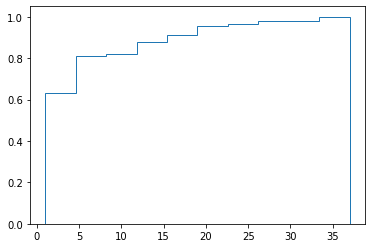

In [368]:
import matplotlib.pyplot as plt

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,cumulative = True,density=True, histtype='step',label = 'Empirical')
    plt.show()

# unweighted degree distribution (cdf) of G1
plot_degree_dist(g1)

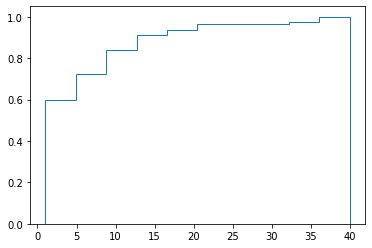

In [369]:
# unweighted degree distribution (cdf) of G2
plot_degree_dist(g2)

팬덤은 주로 소수의 팬덤들과 도움을 주고받는다.

G1과 G2의 unweighted degree distribution에서 볼 수 있듯이, 대부분의 팬덤들의 degree는 0-10사이에 위치해 있다. 이를 통해 팬덤들은 소수의 팬덤들과 도움을 주고받는다는 것을 알 수 있다.


## 2. in-degree, out-degree 기준 top 10 fandom의 정보를 기술하라

In [370]:
# G1의 in-degree 기준 top 10 Fandom
sorted(dict(g1.in_degree(weight='weight')).items(),key=lambda x: x[1],reverse = True)[:10]

[('jinseongho', 5142),
 ('dongho', 4361),
 ('winkgall', 3632),
 ('kimjaehwan', 3592),
 ('jbj', 3225),
 ('kim', 3158),
 ('leejunyoung', 2866),
 ('wartortle', 2853),
 ('leesoomin', 2698),
 ('gf', 2505)]

In [371]:
# G1의 out-degree 기준 top 10 Fandom
sorted(dict(g1.out_degree(weight='weight')).items(),key=lambda x: x[1],reverse = True)[:10]

[('woojinyoung', 3874),
 ('jbj', 3099),
 ('kim', 3018),
 ('ohmygirl', 2901),
 ('jinseongho', 2136),
 ('leesoomin', 2118),
 ('girllaboum', 2068),
 ('chungha', 1969),
 ('leejunyoung', 1604),
 ('jungsewoon', 1594)]

In [372]:
# G2의 in-degree 기준 top 10 Fandom
sorted(dict(g2.in_degree(weight='weight')).items(),key=lambda x: x[1],reverse = True)[:10]

[('kim', 3928),
 ('jbj', 3056),
 ('ohmygirl', 2576),
 ('dongho', 2357),
 ('kdani', 2101),
 ('jsh', 1828),
 ('winkgall', 1817),
 ('kimjaehwan', 1730),
 ('wannaone', 1534),
 ('leejunyoung', 1316)]

In [373]:
# G2의 out-degree 기준 top 10 Fandom
sorted(dict(g2.out_degree(weight='weight')).items(),key=lambda x: x[1],reverse = True)[:10]

[('jsh', 2522),
 ('highlight', 2213),
 ('kim', 1906),
 ('jbj', 1566),
 ('april', 1327),
 ('winkgall', 1284),
 ('mkyunghoon', 1158),
 ('redvelvetreveluv', 1158),
 ('gx9', 1039),
 ('cosmicgirl', 1014)]

## 3. 팬덤 도움 그래프에서 boy -->boy, boy -->girl, girl -->boy, girl -->girl 경우 비율을 테이블에 기술하고 해석하라

In [375]:
def set_type(G):
    for i in range(len(list(G.edges))):
        a = list(G.edges)[i][0]
        b = list(G.edges)[i][1]
        
        if all(fandom_nodes.loc[fandom_nodes['fandom_id'] == a]['type'] == 1):
            if all(fandom_nodes.loc[fandom_nodes['fandom_id'] == b]['type'] == 1):
                G[a][b]['type'] = '11'
            else:
                G[a][b]['type'] = '10'
        else:
            if all(fandom_nodes.loc[fandom_nodes['fandom_id'] == b]['type'] == 1):
                G[a][b]['type'] = '01'
            else:
                G[a][b]['type'] = '00'

# G1의 edge에 Type attribute 추가
set_type(g1)

In [376]:
# 00 : girl -> grirl
# 01 : girl -> boy
# 10 : boy -> girl
# 11 : boy -> boy

type = ['00','01','10','11']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g1,'type')).values()).count(i) / len(list(dict(nx.get_edge_attributes(g1,'type')).values()))

pd.DataFrame(raw_data, columns = ['00','01','10','11'],index = ['n'])

,00,01,10,11
n,0.109023,0.233083,0.093985,0.56391


1월) boy->boy의 비율이 56% 정도로 총 도움의 절반 이상을 차지하였다.  girl->boy의 비율이 그 다음으로 높았다

In [377]:
# G2에 type attribute 추가
set_type(g2)

type = ['00','01','10','11']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g2,'type')).values()).count(i) / len(list(dict(nx.get_edge_attributes(g2,'type')).values()))

pd.DataFrame(raw_data, columns = ['00','01','10','11'],index = ['n'])


,00,01,10,11
n,0.115385,0.192308,0.126923,0.565385


2월) boy->boy의 비율이 56% 정도로 총 도움의 절반 이상을 차지하였다.  girl->boy의 비율이 그 다음으로 높았다

## 4. 팬덤 도움 그래프에서 대표적인 소속사 간의 도움 비율을 테이블에 기술하고 해석하라

In [851]:
# 대표적인 소속사: 2018년 1월과 2월의 1-5위 소속사로 사용
big = ['SM Entertainment','JYP Entertainment','PLEDIS Entertainment',
       'Woollim Entertainment','YG Entertainment']

def set_agent(G):
    for i in range(len(list(G.edges))):
        a = list(G.edges)[i][0]
        b = list(G.edges)[i][1]
        
        a_agent = [meta[i]['agent'] for i in range(len(meta)) if meta[i]['fandom_name'] == a][0]
        b_agent = [meta[i]['agent'] for i in range(len(meta)) if meta[i]['fandom_name'] == b][0]
        
        if a_agent in big:
            if b_agent in big:
                a_agent = a_agent.replace(' Entertainment', '')
                b_agent = b_agent.replace(' Entertainment', '')
                G[a][b]['big_agent'] = a_agent+'->'+b_agent

# G1에 big_agent attribute 추가
set_agent(g1)

In [853]:
# G2에 big_agent attribute 추가
set_agent(g2)

In [857]:
type = ['PLEDIS->PLEDIS','YG->PLEDIS','YG->JYP','JYP->JYP','SM->PLEDIS','Woollim->Woollim','YG->YG','JYP->PLEDIS']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g1,'big_agent')).values()).count(i) / len(list(dict(nx.get_edge_attributes(g1,'big_agent')).values()))

pd.DataFrame(raw_data, columns = type,index = ['n'])

,PLEDIS->PLEDIS,YG->PLEDIS,YG->JYP,JYP->JYP,SM->PLEDIS,Woollim->Woollim,YG->YG,JYP->PLEDIS
n,0.142857,0.142857,0.071429,0.285714,0.071429,0.142857,0.071429,0.071429


In [860]:
type = ['YG->YG','PLEDIS->PLEDIS','YG->PLEDIS','Woollim->PLEDIS','Woollim->Woollim','JYP->JYP','SM->SM']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g2,'big_agent')).values()).count(i) / len(list(dict(nx.get_edge_attributes(g2,'big_agent')).values()))

pd.DataFrame(raw_data, columns = type,index = ['n'])

,YG->YG,PLEDIS->PLEDIS,YG->PLEDIS,Woollim->PLEDIS,Woollim->Woollim,JYP->JYP,SM->SM
n,0.166667,0.25,0.083333,0.25,0.083333,0.083333,0.083333


대형 소속사끼리 협력이 활발하였고, 소속사 내부에서의 협력도 활발하였다. 1월에는 JYP 소속사 내에서의 도움이 많았으며, 2월에는 플레디스 내에서의 도움과 울림->플레디스의 도움이 많았다. 

In [379]:
def set_agent(G):
    for i in range(len(list(G.edges))):
        a = list(G.edges)[i][0]
        b = list(G.edges)[i][1]
        
        a_agent = [meta[i]['agent'] for i in range(len(meta)) if meta[i]['fandom_name'] == a]
        b_agent = [meta[i]['agent'] for i in range(len(meta)) if meta[i]['fandom_name'] == b]
        
        if a_agent == b_agent:
            G[a][b]['agent'] = a_agent

# G1에 agent attribute 추가
set_agent(g1)

In [455]:
type = ['Brave Entertainment','Cube Entertainment','DSP Media','JYP Entertainment','MNH Entertainment','Music1Company',
       'PLEDIS Entertainment','Santa Music','Source Music','Star Road Entertainment','Starship Entertainment','Swing Entertainment',
       'WM Entertainment','Woollim Entertainment','YG Entertainment','Yuehua Entertainment']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g1,'agent')).values()).count([i]) / len(list(dict(nx.get_edge_attributes(g1,'agent')).values()))

pd.DataFrame(raw_data, columns = type,index = ['n'])

,Brave Entertainment,Cube Entertainment,DSP Media,JYP Entertainment,MNH Entertainment,Music1Company,PLEDIS Entertainment,Santa Music,Source Music,Star Road Entertainment,Starship Entertainment,Swing Entertainment,WM Entertainment,Woollim Entertainment,YG Entertainment,Yuehua Entertainment
n,0.033333,0.033333,0.033333,0.133333,0.033333,0.033333,0.066667,0.066667,0.033333,0.066667,0.1,0.2,0.033333,0.066667,0.033333,0.033333


1월) 스윙, JYP, 스타쉽 소속사 내에서 서로 도움을 많이 주고받았다.

In [415]:
# G2에 agent attribute 추가
set_agent(g2)
set(map(tuple,dict(nx.get_edge_attributes(g2,'agent')).values()))

{('Brave Entertainment',),
 ('Cube Entertainment',),
 ('DSP Media',),
 ('Fantagio Music',),
 ('JYP Entertainment',),
 ('Music1Company',),
 ('PLEDIS Entertainment',),
 ('SM Entertainment',),
 ('Santa Music',),
 ('Source Music',),
 ('Star Crew Entertainment',),
 ('Star Road Entertainment',),
 ('Swing Entertainment',),
 ('The Unit Culture Industry Company',),
 ('Woollim Entertainment',),
 ('YG Entertainment',),
 ('Yuehua Entertainment',)}

In [416]:
type = ['Brave Entertainment','Cube Entertainment','DSP Media','Fantagio Music','JYP Entertainment','Music1Company',
        'PLEDIS Entertainment','SM Entertainment','Santa Music','Source Music','Star Crew Entertainment',
        'Star Road Entertainment','Swing Entertainment','The Unit Culture Industry Company',
        'Woollim Entertainment','YG Entertainment','Yuehua Entertainment']

raw_data = {}
for i in type:
    raw_data[i] = list(dict(nx.get_edge_attributes(g2,'agent')).values()).count([i]) / len(list(dict(nx.get_edge_attributes(g2,'agent')).values()))

pd.DataFrame(raw_data, columns = type,index = ['n'])

,Brave Entertainment,Cube Entertainment,DSP Media,Fantagio Music,JYP Entertainment,Music1Company,PLEDIS Entertainment,SM Entertainment,Santa Music,Source Music,Star Crew Entertainment,Star Road Entertainment,Swing Entertainment,The Unit Culture Industry Company,Woollim Entertainment,YG Entertainment,Yuehua Entertainment
n,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.107143,0.035714,0.142857,0.035714,0.035714,0.071429,0.178571,0.035714,0.035714,0.071429,0.035714


2월) 스윙, 산타뮤직, 플레디스 소속사 내에서 서로 도움을 많이 주고받았음을 알 수 있다.

# Q4. 각 월별로 생성된 두 개의 팬덤 도움 네트워크 G1과 G2를 비교하라

## 1.

In [423]:
# G1에는 있었는데 G2에서는 없어진 경우
set(list(nx.get_edge_attributes(g1,'type'))) - set(list(nx.get_edge_attributes(g2,'type')))

{('ace5', 'dongho'),
 ('aoa', 'chungha'),
 ('aoa', 'gf'),
 ('aoa', 'kim'),
 ('aoa', 'kimjaehwan'),
 ('aoa', 'wartortle'),
 ('b1a4', 'ongsungwoo'),
 ('binhjleehjh', 'dongho'),
 ('binhjleehjh', 'jungsewoon'),
 ('blackpink', 'twice'),
 ('blockb', 'gf'),
 ('blockb', 'jbj'),
 ('blockb', 'kim'),
 ('blockb', 'wartortle'),
 ('boa', 'dongho'),
 ('boa', 'jbj'),
 ('bts', 'jinseongho'),
 ('bts', 'twice'),
 ('chungha', 'chungha'),
 ('chungha', 'gf'),
 ('chungha', 'kdani'),
 ('chungha', 'leejunyoung'),
 ('chungha', 'leesoomin'),
 ('chungha', 'mamamoo'),
 ('chungha', 'nebula'),
 ('chungha', 'wannaone'),
 ('chungha', 'wartortle'),
 ('chungha', 'youjung'),
 ('cmg', 'jinseongho'),
 ('day6', 'jbj'),
 ('day6', 'jinseongho'),
 ('dmlwlsska', 'jaejoong'),
 ('dmlwlsska', 'kimjaehwan'),
 ('dmlwlsska', 'leesoomin'),
 ('doitamazing7', 'dongho'),
 ('doitamazing7', 'jbj'),
 ('doitamazing7', 'kim'),
 ('doitamazing7', 'leejunyoung'),
 ('doitamazing7', 'leesoomin'),
 ('doitamazing7', 'vikon'),
 ('dongho', 'jinseongho

In [424]:
# G2에는 있었는데 G1에서는 없어진 경우
set(list(nx.get_edge_attributes(g2,'type'))) - set(list(nx.get_edge_attributes(g1,'type')))

{('6kies', '6kies'),
 ('6kies', 'jbj'),
 ('6kies', 'jsh'),
 ('ahnhyungsub', 'jbj'),
 ('ahnhyungsub', 'kim'),
 ('april', 'dongho'),
 ('april', 'girllaboum'),
 ('april', 'jbj'),
 ('april', 'kim'),
 ('april', 'kimjaehwan'),
 ('april', 'lovelyz'),
 ('april', 'nuest'),
 ('april', 'ohmygirl'),
 ('april', 'wannaone'),
 ('astro', 'ohmygirl'),
 ('b1a4', 'kim'),
 ('blackpink', 'jbj'),
 ('blackpink', 'mkyunghoon'),
 ('boa', 'wannaone'),
 ('boa', 'winkgall'),
 ('btob', 'jsh'),
 ('btob', 'kdani'),
 ('btob', 'kim'),
 ('btob', 'kimjaehwan'),
 ('btob', 'ohmygirl'),
 ('btob', 'unitg'),
 ('btob', 'wartortle'),
 ('bts', 'jsh'),
 ('buzz', 'buzz'),
 ('buzz', 'jsh'),
 ('buzz', 'kim'),
 ('chan', 'dongho'),
 ('chungha', 'kim'),
 ('chungha', 'ohmygirl'),
 ('chungha', 'redvelvetreveluv'),
 ('cmg', 'jsh'),
 ('cosmicgirl', 'chungha'),
 ('cosmicgirl', 'jungsewoon'),
 ('cosmicgirl', 'kim'),
 ('cosmicgirl', 'kimjaehwan'),
 ('cosmicgirl', 'lovelyz'),
 ('cosmicgirl', 'ohmygirl'),
 ('cosmicgirl', 'vikon'),
 ('cosmicgir

In [506]:
# G1 intersection G2 (도움이 유지되는 경우)
d1 = dict(nx.get_edge_attributes(g1,'type'))
d2 = dict(nx.get_edge_attributes(g2,'type'))

d = {x:d1[x] for x in d1 if x in d2}

type = ['00','01','10','11']

raw_data = {}
for i in type:
    raw_data[i] = list(d.values()).count(i) / len(list(d.values()))

pd.DataFrame(raw_data, columns = ['00','01','10','11'],index = ['n'])

,00,01,10,11
n,0.072727,0.163636,0.072727,0.690909


In [482]:
# G1에는 있었는데 G2에서는 없어진 경우
e = {x:d1[x] for x in d1 if x not in d2}
e

type = ['00','01','10','11']

raw_data = {}
for i in type:
    raw_data[i] = list(e.values()).count(i) / len(list(e.values()))

pd.DataFrame(raw_data, columns = ['00','01','10','11'],index = ['n'])

,00,01,10,11
n,0.118483,0.251185,0.099526,0.530806


In [484]:
# G2에는 있었는데 G1에서는 없어진 경우
f = {x:d2[x] for x in d2 if x not in d1}
f

type = ['00','01','10','11']

raw_data = {}
for i in type:
    raw_data[i] = list(f.values()).count(i) / len(list(f.values()))

pd.DataFrame(raw_data, columns = ['00','01','10','11'],index = ['n'])

,00,01,10,11
n,0.126829,0.2,0.141463,0.531707


In [705]:
print(len(e))
print(len(f))
print(len(d))

211
205
55


1월에는 도움을 주고받았는데 2월에는 도움을 주고받지 않은 팬덤은 211개, 1월에는 도움을 주고받지 않았는데 2월에는 도움을 주고받은 팬덤은 205개, 1월과 2월에 도움을 주고받은 팬덤은 55개이다. 

Boy그룹 간 도움을 유지할 확률이 1월에는 있었는데 2월에는 없어지거나, 1월에는 없었는데 2월에는 있을 확률보다 높았다.

## 2. 각 팬덤 별로 도움 받는 / 도움 주는 팬덤들이 G 1 과 G 2 에서 유사한지를 측정하라 (Hint: cosine similarity 를 활용하여 유사도 측정 가능 ) 측정된 유사도의 분포를 CDF 로 그리고 해석하라

In [425]:
from sklearn.metrics.pairwise import cosine_similarity

In [700]:
g1_new = nx.DiGraph()
g1_new.add_weighted_edges_from(fandom_edges.loc[:,('source','target','jan_support')].dropna().values.tolist())

g2_new = nx.DiGraph()
g2_new.add_weighted_edges_from(fandom_edges.loc[:,('source','target','feb_support')].dropna().values.tolist())

# adjacency matrix
adj_g1 = nx.adjacency_matrix(g1_new).A
adj_g2 = nx.adjacency_matrix(g2_new).A

In [701]:
# 같은 노드들끼리 비교해야 하므로, diagonal part를 추출
cos_sim = cosine_similarity(adj_g1,adj_g2).diagonal()
cos_sim

array([0.2875774 , 0.57099292, 0.77712906, 0.07513382, 0.51351374,
       0.75918652, 0.59051887, 0.76882916, 0.462494  , 0.72976806,
       0.77325871, 0.89651644, 0.69272675, 0.13075363, 0.        ,
       0.84067049, 0.91688995, 0.49937856, 0.38586654, 0.81931546,
       0.54588249, 0.78049469, 0.67651914, 0.71022862, 0.5933466 ,
       0.76546187, 0.78317084, 0.56819416, 0.39886103, 0.63209394,
       0.29937269, 0.08504705, 0.63931102, 0.44739465, 0.56899843,
       0.61421526, 0.91086716, 0.45533788, 0.402295  , 0.42426954,
       0.56499708, 0.37943003, 0.75093568, 0.38139938, 0.59942522,
       0.71574633, 0.43136427, 0.81982822, 0.624232  , 0.        ,
       0.59881959, 0.78481104, 0.42465404, 0.30745658, 0.53331592,
       0.71831605, 0.61874194, 0.59674908, 0.59065451, 0.70315912,
       0.77018637, 0.59174545, 0.79845211, 0.72337858, 0.25126077,
       0.12545855, 0.15494893, 0.        , 0.        , 0.33114053,
       0.56263212, 0.60567776, 0.1256844 , 0.37690985, 0.59904

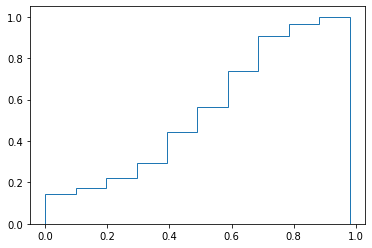

In [702]:
np.cumsum(cos_sim)
plt.hist(cos_sim,cumulative = True,density = True,histtype='step',label = 'Empirical')
plt.show()

In [703]:
adj_g1 = nx.adjacency_matrix(g1_new,weight = False).A
adj_g2 = nx.adjacency_matrix(g2_new,weight = False).A
cos_sim = cosine_similarity(adj_g1,adj_g2).diagonal()
cos_sim

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

(weight을 고려하지 않은) G1와 G2의 유사도는 거의 모든 노드들에서 1에 가깝다. 따라서 각 팬덤별로 도움을 주고 받는 팬덤들이 1월과 2월에 매우 유사함을 확인할 수 있다.

(weight을 고려한) 유사도의 cdf가 가파르게 증가한 부분도 있고, 완만하게 증가한 부분도 있다. 이를 통해 특정 팬덤들에 대해서는 G1과 G2에서 주고받은 도움수가 비슷하지만, 다른 팬덤들에 대해서는 G1과 G2에서 주고받은 도움수에 차이가 있다는 것을 확인할 수 있다.

## 3. G1 에서 degree connectivity 기준으로 역할을 많이 하였던 팬덤들이 G2 에서도 여전히 역할을 많이 하는지 분석하라

In [522]:
sorted(dict(nx.degree_centrality(g1)).items(),key=lambda x: x[1],reverse = True)[:20]

[('jinseongho', 0.42045454545454547),
 ('jbj', 0.38636363636363635),
 ('kim', 0.3181818181818182),
 ('dongho', 0.26136363636363635),
 ('leesoomin', 0.25),
 ('leejunyoung', 0.23863636363636365),
 ('woojinyoung', 0.23863636363636365),
 ('jungsewoon', 0.2159090909090909),
 ('chungha', 0.20454545454545456),
 ('kimjaehwan', 0.19318181818181818),
 ('ohmygirl', 0.19318181818181818),
 ('wartortle', 0.17045454545454547),
 ('wannaone', 0.14772727272727273),
 ('winkgall', 0.14772727272727273),
 ('twice', 0.13636363636363635),
 ('girllaboum', 0.13636363636363635),
 ('gf', 0.11363636363636365),
 ('mkyunghoon', 0.09090909090909091),
 ('kdani', 0.09090909090909091),
 ('jaejoong', 0.07954545454545454)]

In [523]:
sorted(dict(nx.degree_centrality(g2)).items(),key=lambda x: x[1],reverse = True)[:20]

[('kim', 0.5063291139240507),
 ('jbj', 0.46835443037974683),
 ('jsh', 0.4430379746835443),
 ('ohmygirl', 0.27848101265822783),
 ('dongho', 0.26582278481012656),
 ('leejunyoung', 0.25316455696202533),
 ('highlight', 0.24050632911392406),
 ('wannaone', 0.18987341772151897),
 ('mkyunghoon', 0.18987341772151897),
 ('kdani', 0.18987341772151897),
 ('kimjaehwan', 0.17721518987341772),
 ('jungsewoon', 0.16455696202531644),
 ('redvelvetreveluv', 0.16455696202531644),
 ('wartortle', 0.1518987341772152),
 ('chungha', 0.1518987341772152),
 ('april', 0.13924050632911392),
 ('girllaboum', 0.13924050632911392),
 ('winkgall', 0.13924050632911392),
 ('gx9', 0.12658227848101267),
 ('btob', 0.11392405063291139)]

degree connectivity의 간단한 measure로 degree centrality를 선택하였다. G1에서 degree centrality가 높은 상위 10개의 팬덤과 G2에서 degree centrality가 높은 상위 10개의 팬덤이 많이 겹치는 것을 알 수 있다. 

즉 G1에서 degree connectity를 기준으로 역할을 많이 하였던 팬덤들이 G2에서도 역할을 많이 한다는 것을 유추할 수 있다.

# Q5. 팬덤간의 도움 현상이 음원 챠트에 미치는 영향에 대해 분석하라

In [581]:
jan = [mon for mon in monthly if mon['start'] == '201801']
feb = [mon for mon in monthly if mon['start'] == '201802']

In [784]:
jan

[{'rank': 1,
  'title': '그날처럼',
  'artist': '장덕철',
  'album': '그날처럼',
  'start': '201801',
  'end': '201801'},
 {'rank': 2,
  'title': 'instagram',
  'artist': 'DEAN',
  'album': 'instagram',
  'start': '201801',
  'end': '201801'},
 {'rank': 3,
  'title': '비행운',
  'artist': '문문 (MoonMoon)',
  'album': 'LIFE IS BEAUTY FULL',
  'start': '201801',
  'end': '201801'},
 {'rank': 4,
  'title': '선물',
  'artist': '멜로망스',
  'album': 'Moonlight',
  'start': '201801',
  'end': '201801'},
 {'rank': 5,
  'title': '#첫사랑',
  'artist': '볼빨간사춘기',
  'album': '#첫사랑',
  'start': '201801',
  'end': '201801'},
 {'rank': 6,
  'title': 'Heart Shaker',
  'artist': 'TWICE (트와이스)',
  'album': 'Merry & Happy',
  'start': '201801',
  'end': '201801'},
 {'rank': 7,
  'title': '겨울소리',
  'artist': '박효신',
  'album': '겨울소리',
  'start': '201801',
  'end': '201801'},
 {'rank': 8,
  'title': '밤이 되니까',
  'artist': '펀치 (Punch)',
  'album': '밤이 되니까',
  'start': '201801',
  'end': '201801'},
 {'rank': 9,
  'title': '기억의 빈자리'

In [890]:
nodes3 = fandom_nodes
edges3 = fandom_edges

jan_gave = edges3.groupby('source')['jan_support'].sum()
feb_gave = edges3.groupby('source')['feb_support'].sum()

jan_given = edges3.groupby('target')['jan_support'].sum()
feb_given = edges3.groupby('target')['feb_support'].sum()

merged2 = pd.DataFrame(fandom_nodes[['fandom_name','fandom_id']])
merged2 = pd.merge(merged2,jan_gave,left_on = 'fandom_id',right_on = 'source')
merged2 = pd.merge(merged2,feb_gave,left_on = 'fandom_id',right_on = 'source')
merged2.columns = ['fandom_name','fandom_id','jan_gave','feb_gave']
merged2 = pd.merge(merged2,jan_given,left_on = 'fandom_id',right_on = 'target')
merged2 = pd.merge(merged2,feb_given,left_on = 'fandom_id',right_on = 'target')
merged2.columns = ['fandom_name','fandom_id','jan_gave','feb_gave','jan_given','feb_given']

merged2['jan'] = merged2['jan_gave'] + merged2['jan_given']
merged2['feb'] = merged2['feb_gave'] + merged2['feb_given']

merged2.head()

,fandom_name,fandom_id,jan_gave,feb_gave,jan_given,feb_given,jan,feb
0,KIM SU-HYUN : 김수현(미스틱),000115sh,1436,94,1292,38,2728,132
1,KIM DONG-HYUN / MXM : 김동현,19980917,1338,974,1156,856,2494,1830
2,2PM,2PM,1677,330,269,84,1946,414
3,SECHSKIES : 젝스키스,6kies,1942,2732,2566,2446,4508,5178
4,JESSICA : 제시카,Jessica,796,379,643,155,1439,534


In [864]:
meta

[{'fandom_name': '6kies',
  'chart_name': None,
  'agent': 'YG Entertainment',
  'year(debut)': 1997,
  'post_num': 293338},
 {'fandom_name': 'acejun',
  'chart_name': None,
  'agent': 'Beat Interactive',
  'year(debut)': 2017,
  'post_num': 2106},
 {'fandom_name': 'ahnhyungsub',
  'chart_name': None,
  'agent': 'Yuehua Entertainment',
  'year(debut)': 2017,
  'post_num': 98096},
 {'fandom_name': 'anyujin',
  'chart_name': 'IZ*ONE (아이즈원)',
  'agent': 'Off The Record',
  'year(debut)': 2018,
  'post_num': 34362},
 {'fandom_name': 'aoa',
  'chart_name': 'AOA',
  'agent': 'FNC Entertainment',
  'year(debut)': 2012,
  'post_num': 39128},
 {'fandom_name': 'apink',
  'chart_name': 'Apink (에이핑크)',
  'agent': 'Plan A Entertainment',
  'year(debut)': 2011,
  'post_num': 737383},
 {'fandom_name': 'april',
  'chart_name': None,
  'agent': 'DSP Media',
  'year(debut)': 2015,
  'post_num': 62562},
 {'fandom_name': 'astro',
  'chart_name': None,
  'agent': 'Fantagio Music',
  'year(debut)': 2016,
  

In [882]:
jan

[{'rank': 1,
  'title': '그날처럼',
  'artist': '장덕철',
  'album': '그날처럼',
  'start': '201801',
  'end': '201801'},
 {'rank': 2,
  'title': 'instagram',
  'artist': 'DEAN',
  'album': 'instagram',
  'start': '201801',
  'end': '201801'},
 {'rank': 3,
  'title': '비행운',
  'artist': '문문 (MoonMoon)',
  'album': 'LIFE IS BEAUTY FULL',
  'start': '201801',
  'end': '201801'},
 {'rank': 4,
  'title': '선물',
  'artist': '멜로망스',
  'album': 'Moonlight',
  'start': '201801',
  'end': '201801'},
 {'rank': 5,
  'title': '#첫사랑',
  'artist': '볼빨간사춘기',
  'album': '#첫사랑',
  'start': '201801',
  'end': '201801'},
 {'rank': 6,
  'title': 'Heart Shaker',
  'artist': 'TWICE (트와이스)',
  'album': 'Merry & Happy',
  'start': '201801',
  'end': '201801'},
 {'rank': 7,
  'title': '겨울소리',
  'artist': '박효신',
  'album': '겨울소리',
  'start': '201801',
  'end': '201801'},
 {'rank': 8,
  'title': '밤이 되니까',
  'artist': '펀치 (Punch)',
  'album': '밤이 되니까',
  'start': '201801',
  'end': '201801'},
 {'rank': 9,
  'title': '기억의 빈자리'

In [894]:
def jan_rank(df):
    df.loc[:,'jan_rank'] = np.nan
    for jan_i in jan:
        for meta_j in meta:
            if jan_i['artist'] == meta_j['chart_name']:
                if all(df.loc[df['fandom_id'] == meta_j['fandom_name'],'jan_rank'].isnull()):
                    df.loc[df['fandom_id'] == meta_j['fandom_name'],'jan_rank'] = jan_i['rank']
                
jan_rank(merged2)

In [897]:
def feb_rank(df):
    df.loc[:,'feb_rank'] = np.nan
    for feb_i in feb:
        for meta_j in meta:
            if feb_i['artist'] == meta_j['chart_name']:
                if all(df.loc[df['fandom_id'] == meta_j['fandom_name'],'feb_rank'].isnull()):
                    df.loc[df['fandom_id'] == meta_j['fandom_name'],'feb_rank'] = feb_i['rank']
                
feb_rank(merged2)

In [907]:
merged2.loc[merged2['jan_rank'].isnull() == False, :].sort_values(by=['jan_rank'], axis=0)[:100]

,fandom_name,fandom_id,jan_gave,feb_gave,jan_given,feb_given,jan,feb,jan_rank,feb_rank
148,MOMO / TWICE : 모모,momo,154,120,190,44,344,164,6.0,15.0
88,JIHYO / TWICE : TWICE 지효,jihyo,481,681,361,292,842,973,6.0,15.0
215,TZUYU / TWICE : 쯔위,tzuyu0614,15,11,0,1,15,12,6.0,15.0
214,MINA / TWICE : 미나,twicemina,402,133,105,14,507,147,6.0,15.0
213,TWICE,twice,2882,2193,4721,2404,7603,4597,6.0,15.0
34,DAHYUN / TWICE : 다현,dahyeon,258,177,136,99,394,276,6.0,15.0
184,SANA / TWICE : 사나,sanarang,23,50,23,24,46,74,6.0,15.0
93,YOON JONG-SHIN : 윤종신,jongshin,585,618,277,95,862,713,13.0,17.0
177,Red Velvet : 레드벨벳의레벨업,redvelvetreveluv,4486,4557,2421,3885,6907,8442,15.0,3.0
95,JOY / Red Velvet : 조이,joy,373,169,120,124,493,293,15.0,3.0


In [917]:
merged2.loc[:,['fandom_name','jan','jan_rank']].sort_values(by=['jan_rank'], axis=0)[:50]

,fandom_name,jan,jan_rank
148,MOMO / TWICE : 모모,344,6.0
88,JIHYO / TWICE : TWICE 지효,842,6.0
215,TZUYU / TWICE : 쯔위,15,6.0
214,MINA / TWICE : 미나,507,6.0
213,TWICE,7603,6.0
34,DAHYUN / TWICE : 다현,394,6.0
184,SANA / TWICE : 사나,46,6.0
93,YOON JONG-SHIN : 윤종신,862,13.0
177,Red Velvet : 레드벨벳의레벨업,6907,15.0
95,JOY / Red Velvet : 조이,493,15.0


In [920]:
# 1월의 rank가 100위 밖인 아이돌그룹의 도움수의 평균
merged2.loc[merged2['jan_rank'].isnull(),['jan']].mean()

jan    3851.388298
dtype: float64

In [921]:
# 1월의 rank가 100위 이내인 아이돌그룹의 도움수의 평균
merged2.loc[merged2['jan_rank'].isnull() == False,['jan']].mean()

jan    5683.8125
dtype: float64

In [922]:
# 2월의 rank가 100위 밖인 아이돌그룹의 도움수의 평균
merged2.loc[merged2['feb_rank'].isnull(),['feb']].mean()

feb    1928.171123
dtype: float64

In [923]:
# 2월의 rank가 100위 이내인 아이돌그룹의 도움수의 평균
merged2.loc[merged2['feb_rank'].isnull() == False,['feb']].mean()

feb    3621.489796
dtype: float64

1월, 2월 모두 평균적으로 음악차트 순위가 100위 이내인 아이돌그룹의 도움 수가 음악차트 순위가 100위 밖인 아이돌그룹의 도움 수보다 많았다. 

따라서, 팬덤간의 도움이 음악차트 순위 향상에 영향을 미친다는 것을 짐작할 수 있다.

In [925]:
merged2.jan.corr(merged2.jan_rank, method="spearman")

0.6075290889863947

In [926]:
merged2.feb.corr(merged2.feb_rank, method="spearman")

0.5296061723532236

1월, 2월의 도움 수와 음악 차트 순위의 Spearman rank correlation은 0.61, 0.53으로 계산되었다. 즉 팬덤 간의 도움이 100위 이내의 순위에서 등수를 올리는 데에는 큰 영향을 미치지 못한다.

# Q6. Optional) 팬덤간의 도움 현상의 본질 을 이해할 수 있는 추가 분석할 내용이 있으면 분석 문제 정의 및 분석 결과를 기술하라

## 도움을 받은 팬덤이 도움을 받은 팬덤에게 도움을 줄 확률

In [722]:
symcheck1 = nx.adjacency_matrix(g1_new,weight = False).A
symcheck2 = nx.adjacency_matrix(g2_new,weight = False).A

In [723]:
np.count_nonzero((symcheck1 == symcheck1.transpose())) / len(symcheck1)**2

0.8406084656084656

In [724]:
np.count_nonzero((symcheck2 == symcheck2.transpose())) / len(symcheck2)**2

0.8406084656084656

## 팬덤간 협력은 도움을 주고받는 양에 있어서 공평하지 않다

In [805]:
unfair1 = nx.adjacency_matrix(g1_new).A
unfair2 = nx.adjacency_matrix(g2_new).A

In [802]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))
distance(unfair1,unfair1.transpose())

4808.993241833471

In [803]:
distance(unfair2,unfair2.transpose())

2972.0383577605453

In [809]:
merged[:20]

,fandom_name,fandom_id,sum_post,gave_support,given_support,sum_support,index
0,KIM SU-HYUN : 김수현(미스틱),000115sh,1796,1530,1330,2860,1.592428
1,KIM DONG-HYUN / MXM : 김동현,19980917,6722,2312,2012,4324,0.643261
2,2PM,2PM,2142,2007,353,2360,1.101774
3,SECHSKIES : 젝스키스,6kies,72651,4674,5012,9686,0.133322
4,JESSICA : 제시카,Jessica,1637,1175,798,1973,1.205254
5,A.C.E : ACE,ace5,3993,2839,3289,6128,1.534686
6,"JUN / A.C.E : 준(JUN,박준희)",acejun,1999,1628,1197,2825,1.413207
7,HYEONGSEOP / Hyeongseop X Euiwoong : 안형섭,ahnhyungsub,14166,4828,6473,11301,0.797755
8,AOA,aoa,11784,5588,948,6536,0.554650
9,Apink : 에이핑크,apink,149491,2156,324,2480,0.016590


G1과 G2의 adjacency matrix와 그것의 transpose의 component-wise distance를 계산하였을 때 그 값이 크게 나왔으며, gave_support와 given_support를 비교하였을 때 값의 차이가 큰 경우가 많았다.

따라서 팬덤간 도움을 주고받기는 하지만, 도움을 주는 양에 있어서 공평하지는 않다.

## 소수의 팬덤이 전체 팬덤간 협력에 큰 영향을 미친다

In [745]:
sorted_sum = merged.sort_values(by = 'sum_support',ascending = False)['sum_support']

In [747]:
(np.cumsum(sorted_sum) / sorted_sum.sum())[:20]

105    0.025650
83     0.048355
135    0.067842
53     0.085203
138    0.101737
161    0.118138
99     0.134363
29     0.149556
70     0.164636
227    0.179526
146    0.194127
39     0.207699
89     0.220249
218    0.232494
224    0.244456
103    0.256169
52     0.267711
97     0.279239
143    0.290516
37     0.301554
Name: sum_support, dtype: float64

In [749]:
20/len(sorted_sum)

0.0847457627118644

0.08퍼센트의 팬덤이 전체 도움수의 30%를 차지하는 것을 확인할 수 있다. 즉 소수의 팬덤이 전체 팬덤간 협력에 큰 영향을 미친다.